# Business Objective

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

 
### Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Housing Price Prediction using Linear, Ridge and Lasso Regression

The solution is divided into the following sections:

1. Data understanding and exploration
2. Data cleaning
3. Data preparation
4. Model building and evaluation

In [499]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pendulum

from sklearn import linear_model, metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Visualisations to understand the presence and distribution of missing data within a pandas dataframe
import missingno as msno

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. Data Understanding and Exploration
Let's first have a look at the dataset and understand the size, attribute names etc.

In [500]:
# reading the dataset
housing_df = pd.read_csv("train.csv")
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [501]:
# summary of the dataset: 1460 rows, 81 columns, no null values
# dtypes: float64(3), int64(35), object(43)

print(housing_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [502]:
# Describe the housing dataset
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Understanding the Data Dictionary
Let's split numeric and categorical data.
* numerical values are either of type int or float
* categorical values are of type object

In [503]:
datatype_columns = housing_df.dtypes #type of each feature in data: int, float, object
numerical_columns = datatype_columns[(datatype_columns == 'int64') | (datatype_columns == 'float64')] 
categorical_columns = datatype_columns[datatype_columns == 'object']

In [504]:
pd.DataFrame(datatype_columns).value_counts()

object     43
int64      35
float64     3
dtype: int64

Creating numerical Features list and categorical Features list

In [505]:
numerical_columns_list = numerical_columns.index
categorical_columns_list = categorical_columns.index
print (f"Numerical Features in dataset: {numerical_columns_list}, \n Categorical Features in dataset: {categorical_columns_list}")

Numerical Features in dataset: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object'), 
 Categorical Features in dataset: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 

## Missing Value Ananlysis

Finding dataset with null and na values

In [506]:
# Ratio of columns having null values (out of 1)
round((pd.isnull(housing_df).sum()/len(housing_df.index)),2)[pd.isnull(housing_df).sum() > 0].sort_values()

Electrical      0.00
MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageCond      0.06
GarageQual      0.06
GarageFinish    0.06
GarageType      0.06
GarageYrBlt     0.06
LotFrontage     0.18
FireplaceQu     0.47
Fence           0.81
Alley           0.94
MiscFeature     0.96
PoolQC          1.00
dtype: float64

Let's Considering 90% as threshold for dropping columns with null values

In [507]:
round((pd.isnull(housing_df).sum()/len(housing_df.index)),2)[pd.isnull(housing_df).sum()/ len(housing_df.index) > 0.9].sort_values()

Alley          0.94
MiscFeature    0.96
PoolQC         1.00
dtype: float64

From data_description.txt, we could see that NA is one of the value.
Hence replacing NA with some value as 'None' such that we could work upon null values in a better way.

In [508]:
# Features having NA with meaning using data_description.txt

na_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", \
                  "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", \
                  "GarageCond", "PoolQC", "Fence", "MiscFeature"]

for i in na_has_meaning:
    housing_df[i].fillna("None", inplace=True)

In [509]:
# Ratio of columns having null values (out of 1)
round((pd.isnull(housing_df).sum()/len(housing_df.index)),2)[pd.isnull(housing_df).sum() > 0].sort_values()

Electrical     0.00
MasVnrType     0.01
MasVnrArea     0.01
GarageYrBlt    0.06
LotFrontage    0.18
dtype: float64

As we could see that:
1. Electrical, MasVnrType: are categorical, hence we could replace with None
2. LotFrontage, MasVnrArea, GarageYrBlt: are numeric, hence we could impute as median to handle NA

In [512]:
# Categorical 
housing_df["Electrical"].fillna("None", inplace=True)
housing_df["MasVnrType"].fillna("None", inplace=True)

# Numeric
housing_df["LotFrontage"].fillna(housing_df["LotFrontage"].median(), inplace=True)
housing_df["GarageYrBlt"].fillna(housing_df["GarageYrBlt"].median(), inplace=True)
housing_df["MasVnrArea"].fillna(housing_df["MasVnrArea"].median(), inplace=True)

#### Derived Column
Age of the house - difference between year sold and year bought, we will calculate this and will drop "year sold" and "year bought"

In [513]:
housing_df['Age_Of_House'] = housing_df['YrSold'] - housing_df['YearBuilt']
housing_df.drop(['YrSold','YearBuilt'], axis=1, inplace=True)

In [514]:
housing_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age_Of_House
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,WD,Normal,181500,31


In [515]:
# Ratio of columns having null values (out of 1)
round((pd.isnull(housing_df).sum()/len(housing_df.index)),2)[pd.isnull(housing_df).sum() > 0].sort_values()

# Observation - No columns with missing values

Series([], dtype: float64)

In [516]:
# Dropping rows which are empty
housing_df.dropna(axis=0, inplace=True)

# Dropping "Id" column since it is redundant
housing_df.drop(columns="Id", inplace=True)

In [517]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

## Exploratory Data Analysis

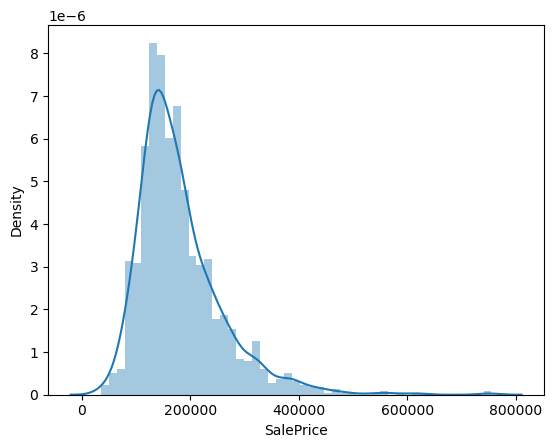

In [518]:
# Distribution of sale price
sns.distplot(housing_df['SalePrice']);

Observation - 
* Distribution seems to be slightly right skewed

##### Extracting Numerical columns

In [519]:
house_numeric = housing_df.select_dtypes(include=['float64', 'int64'])
house_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'Age_Of_House'],
      dtype='object')

In [520]:
categorical_cols = ['MSSubClass','OverallQual','OverallCond','YearRemodAdd','BsmtFullBath','BsmtHalfBath','GarageYrBlt'
       ,'MoSold','Age_Of_House']

# We will drop categorical columns from it
house_numeric = house_numeric.drop(categorical_cols,axis=1)

In [521]:
house_numeric.head(2)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,2,460,298,0,0,0,0,0,0,181500


### Categorical Columns


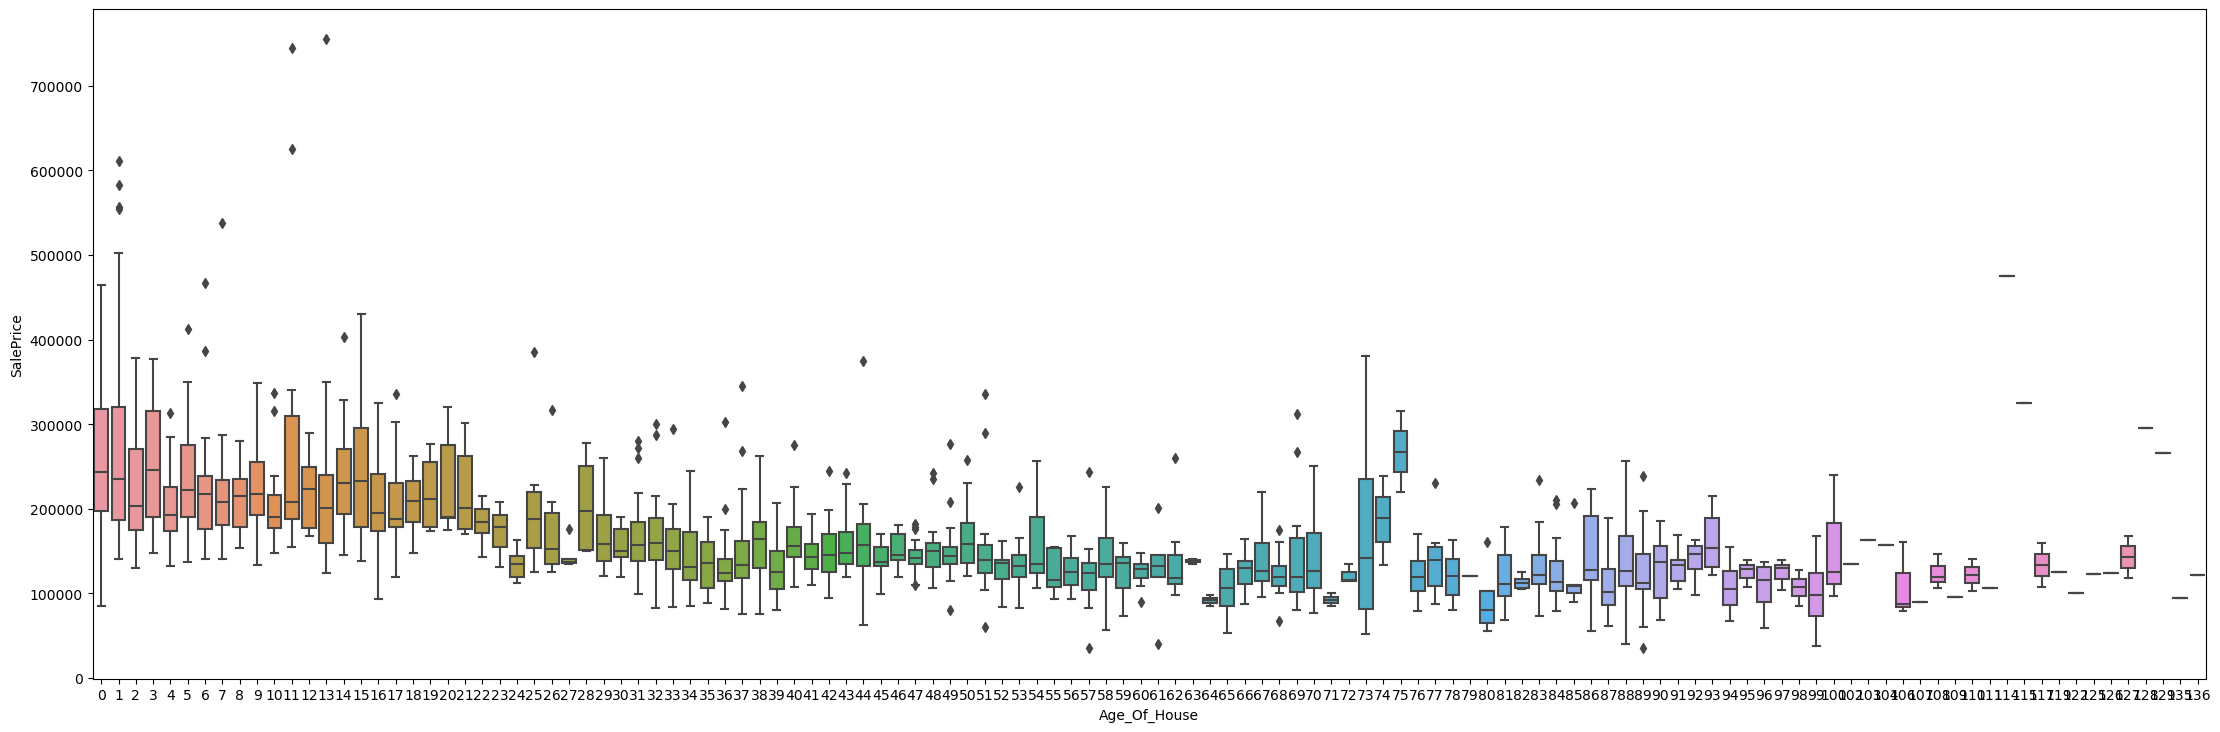

In [522]:
#Age of house vs Sale price
plt.figure(figsize=(60, 40))  
plt.subplot(4,2,1)
sns.boxplot(data=housing_df, x='Age_Of_House',y='SalePrice')
plt.show()

In [523]:
sub_categorical_cols = ['MSSubClass','OverallQual','OverallCond','Utilities','GarageCond','SaleType','SaleCondition']

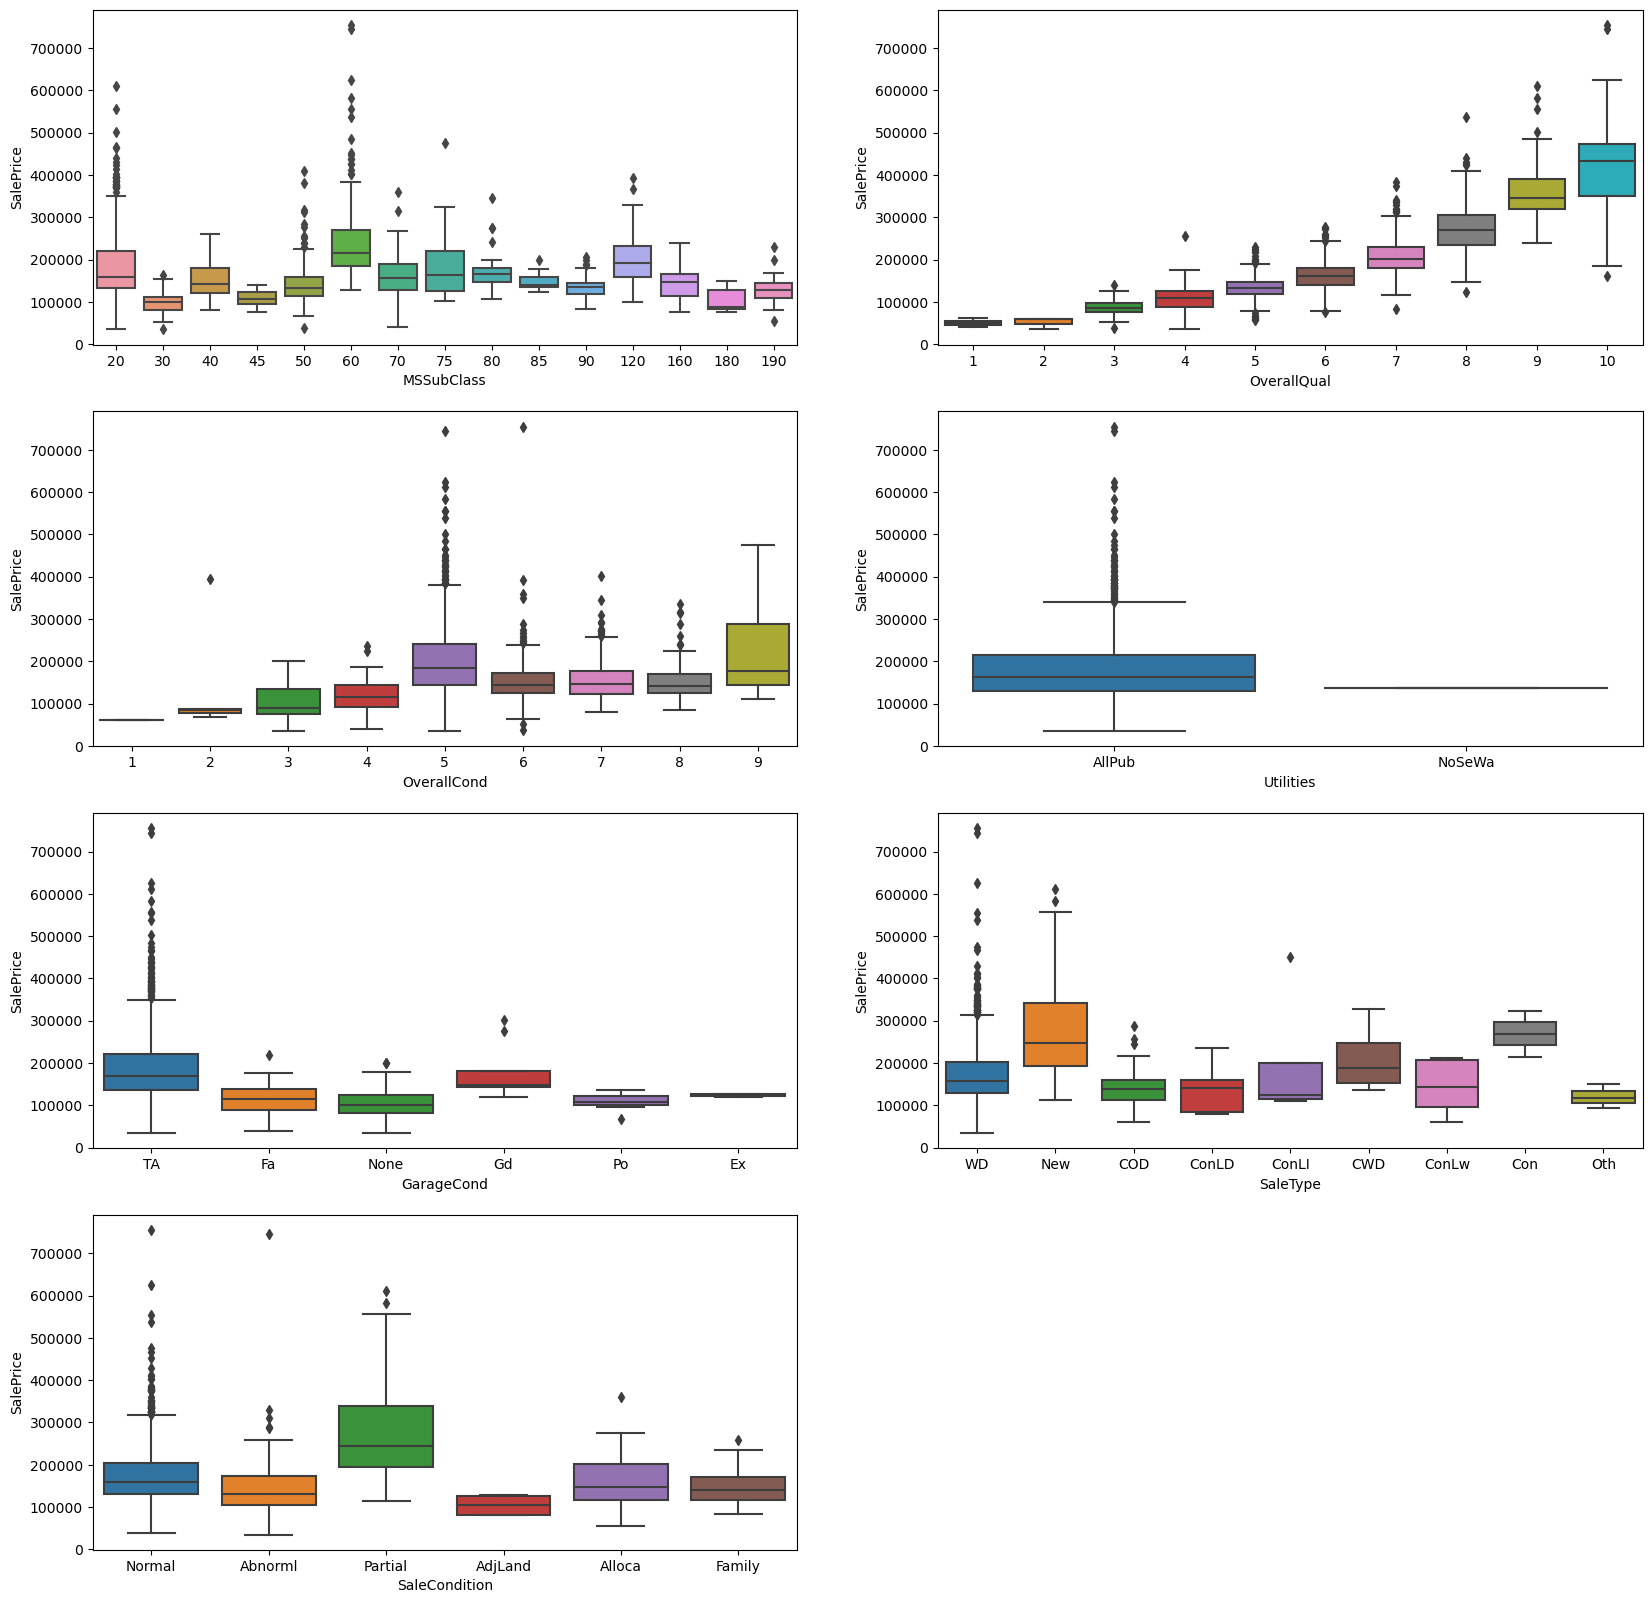

In [524]:
plt.figure(figsize=(20, 20))  
idx=1

for column in sub_categorical_cols:
    plt.subplot(4, 2, idx)
    sns.boxplot(data=housing_df, x=column,y='SalePrice')
    idx = idx + 1
plt.show()  

#### Observations
* Sale Price is high when the age of house is <2 years and decreases if the age of house increases
* Sale Price is high when overall condition and quality are excellent/very excellent
* Sale price is high for dwelling type 2-STORY 1946 & NEWER
* Sale is high for home that is just constructed and new

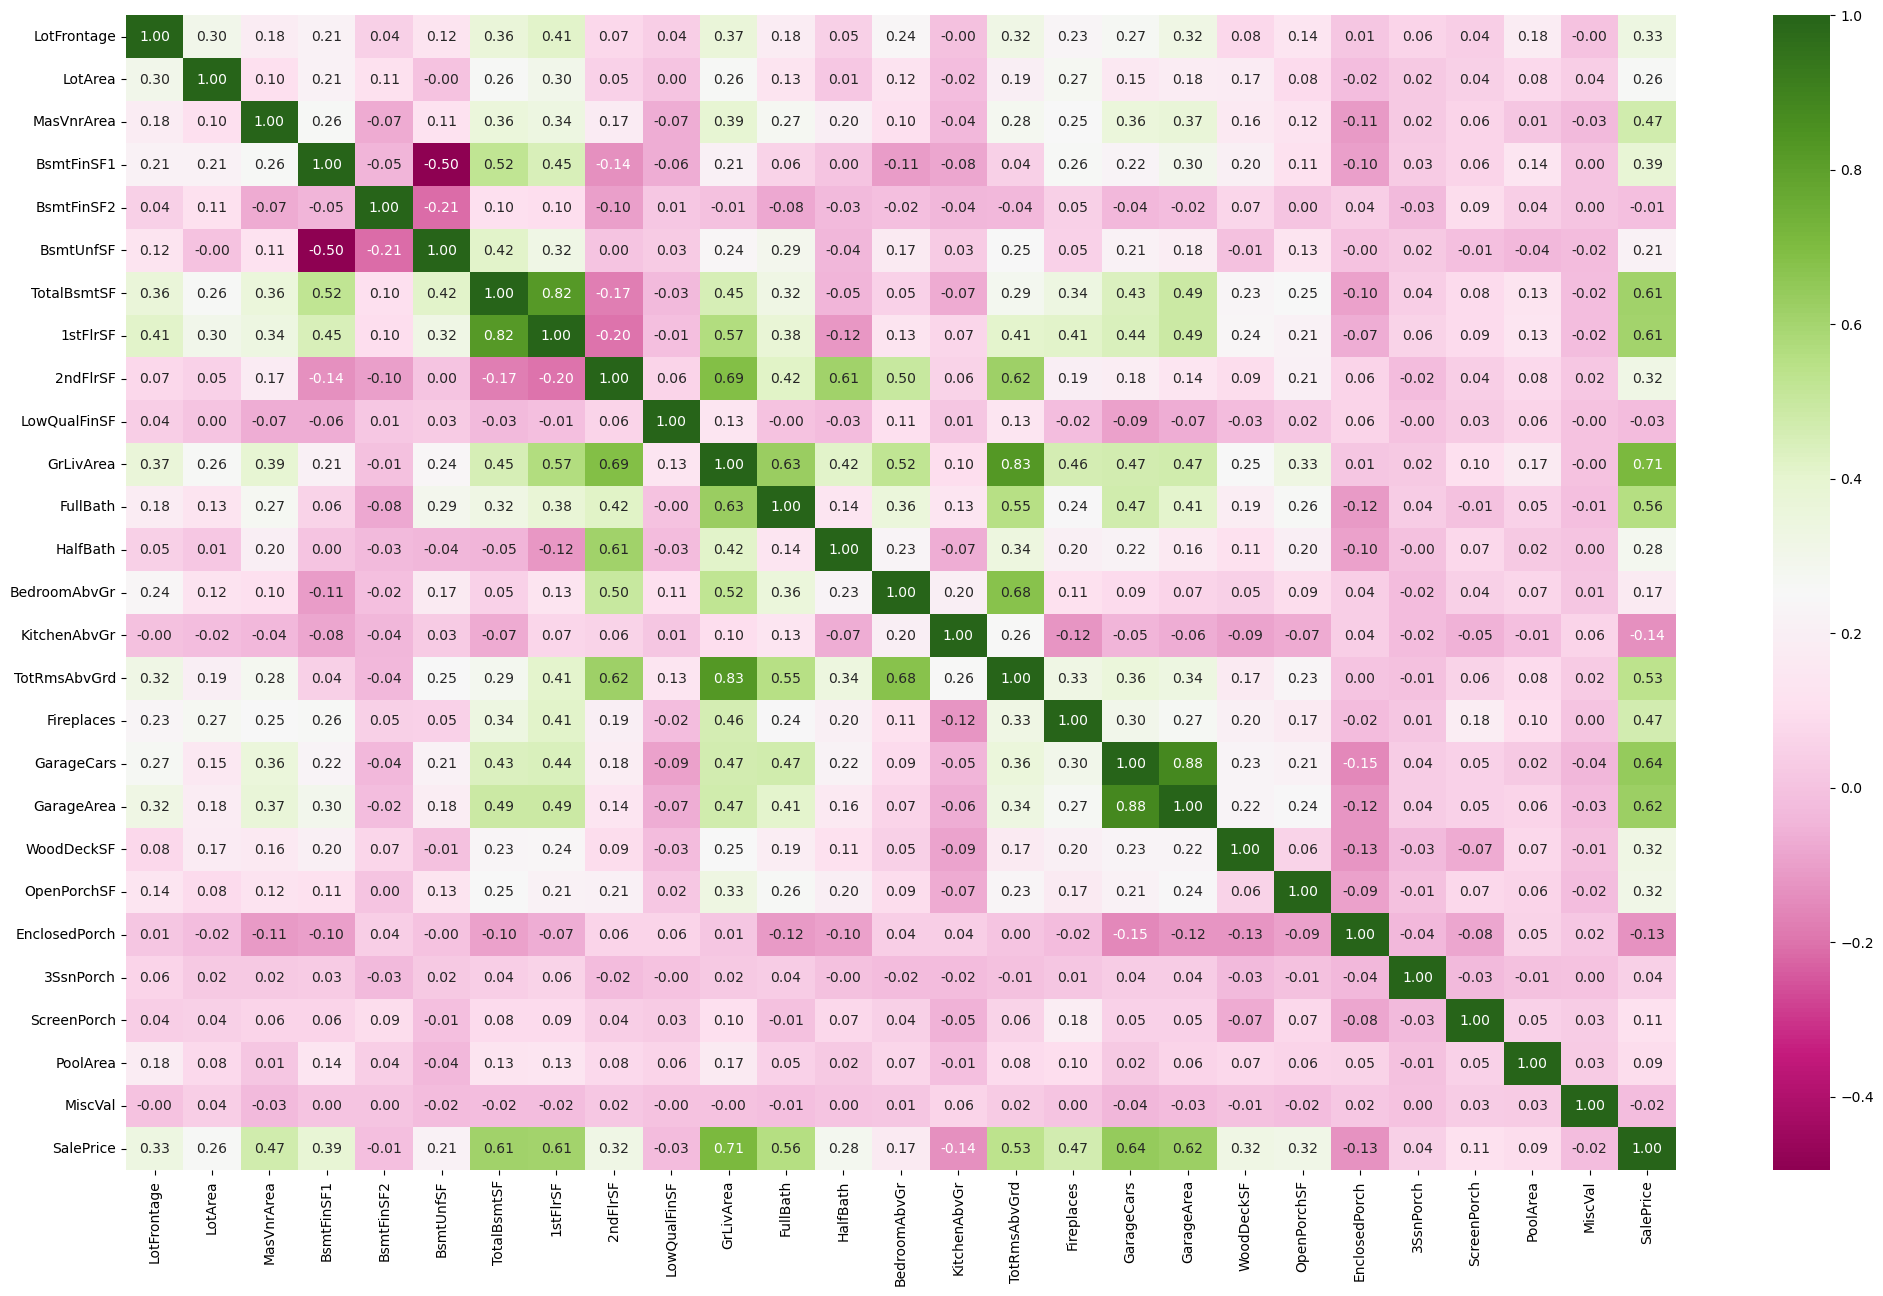

In [525]:
# checking correlation among different numerical variables using clustered heat map

plt.figure(figsize=(25,15))
sns.heatmap(house_numeric.corr(), cmap='PiYG', annot=True, fmt=".2f")
plt.show()

#### Observations
* Living area square feet is highly correlated with sale price(sales price increases if living area square feet is more)
* Total Basement squarefeet ,size of Garrage ars ,Garrage Area is highly correlated with sale price
* Low quality finished ,Enclosed Porch area square feet has negative correlation with sale price
* 1st Floor Squarefeet and total basement square feet are multicollinear
* Living area square feet and total rooms above grade are multicollinear

### Data Preparation (Missing Value Treatment)

* Features PoolQC,MiscFeature,Alley,Fence,FireplaceQu has more missinng values we will drop these columns
* GarageCond,GarageType,GarageFinish,GarageQual Indicates no garage so we will impute as none since no garrage we will update garageYrBlt as 0
* BsmtExposure,BsmtFinType2,BsmtCond,BsmtQual,BsmtFinType1 Indicates no basement we will replace with No Basement
* LotFrontage,MasVnrArea  These are related to distance and cannot be none  we will check if there are outliers if yes we will replace with median else mean to populate these values
* MasVnrType,Electrical We will use mode to impute


In [526]:
housing_df.drop(['PoolQC', 'MiscFeature', 'Alley','Fence','FireplaceQu'],inplace=True,axis=1)


In [527]:
missing_categorical = ['GarageCond', 'GarageType', 'GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtCond','BsmtQual','BsmtFinType1']
for variable in missing_categorical:
    housing_df[variable].fillna(housing_df["GarageYrBlt"].median(), inplace=True)
    
housing_df['GarageYrBlt'].fillna(0, inplace=True)

In [528]:
# Updated Columns
datatype_columns = housing_df.dtypes
numerical_columns = datatype_columns[(datatype_columns == 'int64') | (datatype_columns == 'float64')]
categorical_columns = datatype_columns[datatype_columns == 'object']
numerical_columns_list = numerical_columns.index
categorical_columns_list = categorical_columns.index

In [529]:
numerical_columns_list

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'Age_Of_House'],
      dtype='object')

In [530]:
missing_null_values = round(100*(housing_df.isnull().sum()/len(housing_df.index)),2).sort_values(ascending=False)
missing_null_values

MSSubClass       0.0
GarageYrBlt      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
1stFlrSF         0.0
Electrical       0.0
GarageType       0.0
GarageFinish     0.0
MSZoning         0.0
GarageCars       0.0
SalePrice        0.0
SaleCondition    0.0
SaleType         0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
PavedDrive       0.0
GarageCond       0.0
GarageQual       0.0
GarageArea       0.0
CentralAir       0.0
HeatingQC        0.0
Heating          0.0
TotalBsmtSF      0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle       0.0
BldgType         0.0
Condition2       0.0
Condition1       0.0
Neighborhood     0.0
LandSlope    

#### Observation
* Missing values imputation is completed and no further missing values

In [531]:
# Updated shape for housing dataframe
housing_df.shape

(1460, 74)

## 3. Data Preparation

In [532]:
# Create X for features and y with target variable
X = housing_df.drop(['SalePrice'], axis=1)
y = housing_df['SalePrice']

In [533]:
# select categorical columns
housing_categorical = X.select_dtypes(include=['object'])
housing_categorical.head(5)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [534]:
# Create Dummies for categorical columns
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [535]:
# Drop categorical columns
X = X.drop(list(housing_categorical.columns), axis=1)

# concat dummies to the X
X = pd.concat([X, housing_dummies], axis=1)

In [536]:
# scale features
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=241)

### Split training and testing dataset for validation

In [537]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [538]:
numerical_columns_list

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'Age_Of_House'],
      dtype='object')

In [539]:
# This is a utility function to Compute,Display ?& Store various metrics related to model accuracy 

def print_model_scoreing_metrics(y_train,y_pred_train,y_test,y_pred_test,metric):
    r2_train_lr = r2_score(y_train, y_pred_train)
    print(f"R2 Train : {r2_train_lr}")
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_pred_test)
    print(f"R2 Test : {r2_test_lr}")
    metric.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_pred_train))
    print(f"RSS Train : {rss1_lr}")
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_pred_test))
    print(f"RSS Test : {rss2_lr}")
    metric.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print(f"MSE Train : {mse_train_lr}")
    metric.append(mse_train_lr**0.5)

    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print(f"MSE. Test : {mse_test_lr}")
    metric.append(mse_test_lr**0.5)

## Modelling

We will first create our Baseline models with all features using

1. Linear Regression
2. Ridge
3. Lasso

### Linear Regression
Predicting 'SalePrice' using linear regression.

For feature elimination let's use RFE and try to to find the optimal number of feature

In [540]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, n_features_to_select=70) # Using n_features_to_select=70 to get started
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [541]:
rfe.ranking_

array([122,  17,   1,   1,   1,   6,   7,   1,   1,   1,   1,   1,   1,
         1,   1,  35, 136, 153,  40,   1,   1, 118,  98,  81,   1,  15,
        52,  66, 117,  99, 104,   1, 130, 129,   1,   4,   5,   2,   3,
        11, 152, 167,  85, 125,  38,  75, 159,  16,  70, 144, 163,  76,
        13, 111, 102,  19,  95, 127,   1,  69, 128,  22, 123,  14,  68,
        51,  63,   1,   1,  21,  18, 156, 110,   1,   1,  67,  90,  59,
         1,  62,  60,  82,  58, 160, 162, 138, 139,  74,   1,  30, 137,
       103,  48,  47,   1,   1,  36,  28,  29,  64,   9, 101, 116,  43,
        42, 158,  39,  31,   1,   1,   1,   1,   1,   1,   1,   1, 109,
         1,   1,  34,  79,  78, 113,  50, 171, 161, 148,  77, 140,   1,
       108, 166,   1,  33,  88,  73, 114,   1,  96, 133, 164, 168, 112,
        97,   8, 165, 120, 141,   1,   1, 150,   1,   1,   1,  93,  94,
        23,  83,  80,  20,   1,   1,   1,  65,   1,  37, 124,   1, 134,
        10,  12,  57,  55, 106,   1, 107,  56,  41,  84,  44,   

In [542]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)))
rfe_scores.columns = ['Column_Names', 'Status', 'Rank']

In [543]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', False, 122),
 ('LotFrontage', False, 17),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearRemodAdd', False, 6),
 ('MasVnrArea', False, 7),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 35),
 ('BsmtHalfBath', False, 136),
 ('FullBath', False, 153),
 ('HalfBath', False, 40),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 118),
 ('Fireplaces', False, 98),
 ('GarageYrBlt', False, 81),
 ('GarageCars', True, 1),
 ('GarageArea', False, 15),
 ('WoodDeckSF', False, 52),
 ('OpenPorchSF', False, 66),
 ('EnclosedPorch', False, 117),
 ('3SsnPorch', False, 99),
 ('ScreenPorch', False, 104),
 ('PoolArea', True, 1),
 ('MiscVal', False, 130),
 ('MoSold', False, 129),
 ('Age_Of_House', True, 1),
 ('MSZoning_FV', False, 4),
 ('MSZoning_RH'

In [544]:
# Top columns to be selected using RFE
rfe_selected_columns = X_train.columns[rfe.support_]
rfe_selected_columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars', 'PoolArea',
       'Age_Of_House', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'Condition2_PosN', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'Exterior2nd_Other', 'ExterQual_Gd',
       'ExterQual_TA', 'ExterCond_Gd', 'ExterCond_Po', 'ExterCond_TA',
       'BsmtQual_Gd', 'BsmtQual_None', 'BsmtQual_TA', 'BsmtCond_None',
       'BsmtExposure_Gd', 'BsmtFinType1_None', 'BsmtFinType2_None',
       'K

Lets filter the train and test set for the RFE selected columns

In [545]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

lm_metrics = []
print_model_scoreing_metrics(y_train, y_pred_train, y_test, y_pred_test, ridge_metrics)

R2 Train : 0.9490707246551346
R2 Test : -1.1178673956766333e+20
RSS Train : 324964366051.2195
RSS Test : 3.1509468354638055e+32
MSE Train : 318280476.0540837
MSE. Test : 7.193942546721017e+29


#### Observation - 
* Since we see huge discrepancies in test data, looks like this is overfitting.

We got a rough idea with RFE.

We now move to Ridge and Lasso Regression for further analysis and actual conclusion on right predictors and coefficients.

### Ridge Regression

In [546]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)  


model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [547]:
# Best Fit Params (Alpha)
print(model_cv.best_params_)

{'alpha': 500}


#### Observation
* Optimum value of alpha from ridge is 310

In [548]:
#Fitting Ridge model for alpha and printing coefficients which have been penalised
alpha = model_cv.best_params_["alpha"]

ridge = Ridge(alpha=alpha)
        
ridge.fit(X_train, y_train) 

Ridge(alpha=500)

In [549]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007855,0.001957,0.004356,0.001448,0.0001,{'alpha': 0.0001},-18527.044071,-20515.788307,-20619.038564,-21020.268449,...,-19791.388116,1150.522451,28,-11783.129523,-11478.095571,-11939.927007,-12166.985602,-11614.146497,-11796.456840,241.927191
1,0.005940,0.001602,0.002395,0.000564,0.0010,{'alpha': 0.001},-18526.715351,-20515.403239,-20618.700449,-21019.286665,...,-19790.920769,1150.367745,27,-11783.108890,-11478.078918,-11939.855922,-12166.960698,-11614.151966,-11796.431279,241.914918
2,0.004457,0.000084,0.002020,0.000012,0.0100,{'alpha': 0.01},-18523.434695,-20511.601403,-20615.330663,-21009.502048,...,-19786.267771,1148.835565,26,-11782.903595,-11477.913702,-11939.194231,-12166.710766,-11614.206517,-11796.185762,241.797505
3,0.005856,0.001361,0.003337,0.001013,0.0500,{'alpha': 0.05},-18508.992917,-20495.708023,-20600.598288,-20966.964005,...,-19766.129267,1142.306270,25,-11782.158877,-11477.337164,-11936.873776,-12165.588551,-11614.545470,-11795.300768,241.289038
4,0.006503,0.003866,0.002346,0.000512,0.1000,{'alpha': 0.1},-18491.239924,-20477.863204,-20583.888542,-20915.372908,...,-19742.311839,1134.715190,24,-11781.381540,-11476.769255,-11934.422682,-12164.183106,-11615.434529,-11794.438223,240.596467


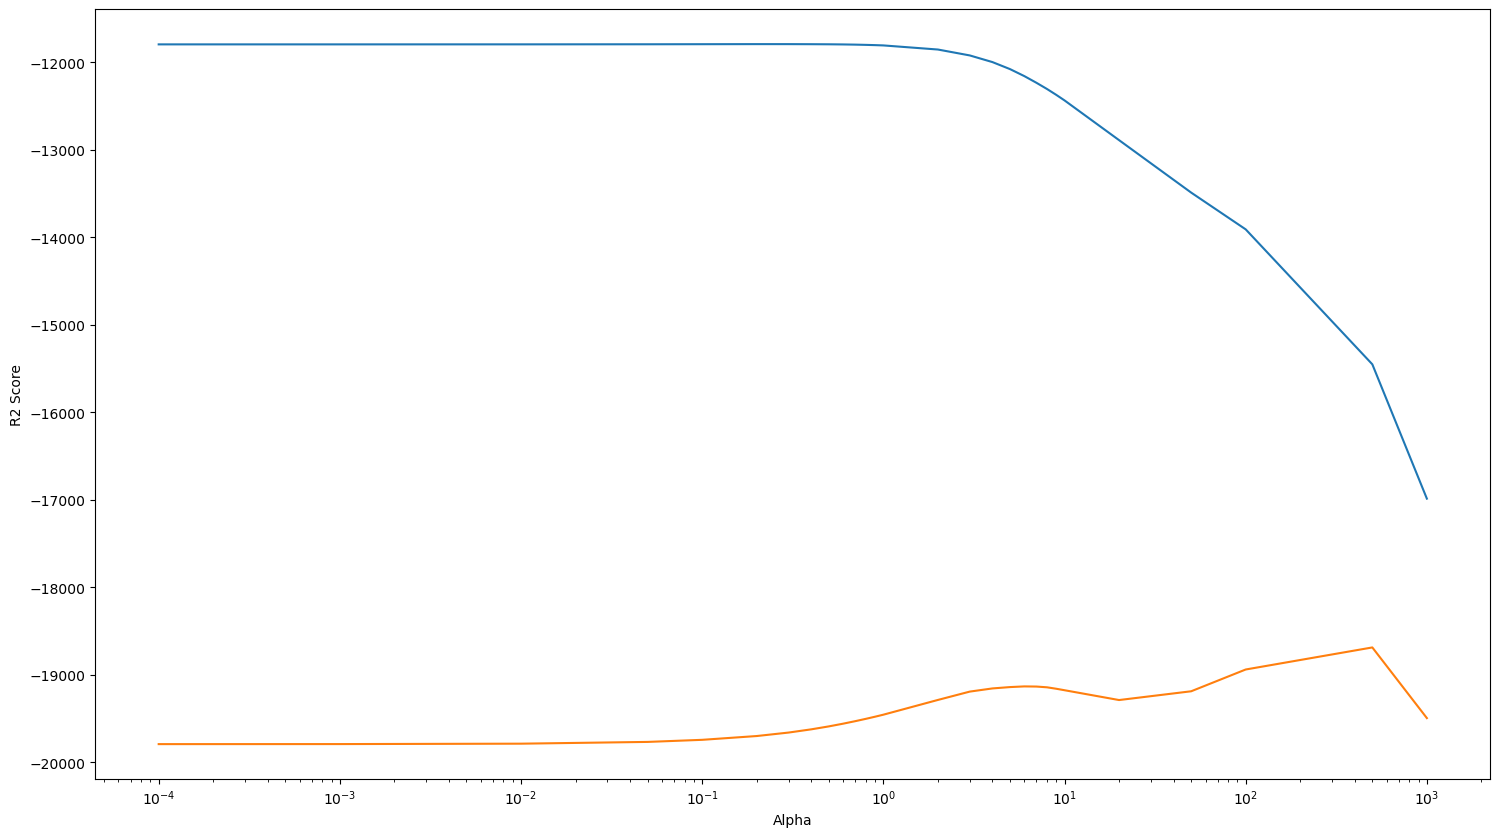

In [550]:
plt.figure(figsize=(18, 10))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [551]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [552]:
ridge_coef.sort_values(by='Coef', ascending=False).head(10)

,Feaure,Coef
0,MSSubClass,180540.342164
4,OverallCond,8808.203342
15,BsmtFullBath,8270.133634
68,Neighborhood_NridgHt,6089.431865
69,Neighborhood_OldTown,5582.710944
12,2ndFlrSF,5531.824699
115,Exterior1st_AsphShn,5160.505781
13,LowQualFinSF,5102.621749
25,GarageArea,4612.151671
22,Fireplaces,4366.040334


In [553]:
# Calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

ridge_metrics = []
print_model_scoreing_metrics(y_train, y_pred_train, y_test, y_pred_test, ridge_metrics)

R2 Train : 0.8837830240477527
R2 Test : 0.8567833775939773
RSS Train : 741545518937.3596
RSS Test : 403686488130.3065
MSE Train : 726293358.4107342
MSE. Test : 921658648.69933


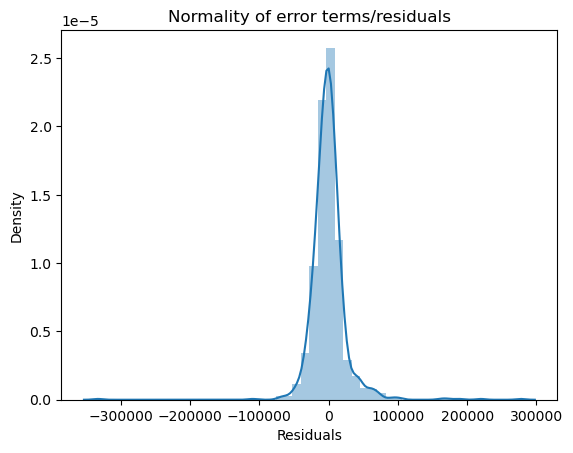

In [554]:
# Distribution of errors -- Normally distributed 
y_residual = y_train - y_pred_train
sns.distplot(y_residual, kde=True)

plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

#### Observations - 
In summary, for ridge:
- The best hyperparameter alpha is 500
- r-squared train = 0.88, r-squared test: 0.86
- There is improvement in r-squared test when compared to linear regression.
- Top 5 features defining "SalePrice" are:
  - MSSubClass
  - OverallCond
  - BsmtFullBath
  - Neighborhood_NridgHt
  - Neighborhood_OldTown

### Lasso Regression

In [555]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)   


model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [556]:
# Best Fit Params (Alpha)
print(model_cv.best_params_)

{'alpha': 500}


#### Observation
* Optimum value of alpha from lasso is 500

In [557]:
alpha = model_cv.best_params_["alpha"]
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=500)

In [558]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.117979,0.028234,0.002343,0.000262,0.0001,{'alpha': 0.0001},-18523.370400,-20497.310942,-20605.434995,-20835.230883,...,-19752.325811,1102.201854,27,-11781.931961,-11477.102000,-11939.642878,-12168.664359,-11614.104891,-11796.289218,242.689619
1,0.101456,0.009279,0.002226,0.000029,0.0010,{'alpha': 0.001},-18523.337101,-20497.167556,-20605.411963,-20835.431981,...,-19752.327593,1102.223868,28,-11781.927581,-11477.097812,-11939.640209,-12168.663077,-11614.102616,-11796.286259,242.690406
2,0.109931,0.013732,0.002205,0.000053,0.0100,{'alpha': 0.01},-18523.004126,-20495.733717,-20605.171342,-20837.439741,...,-19752.322146,1102.469477,26,-11781.902063,-11477.066114,-11939.614384,-12168.653871,-11614.095962,-11796.266479,242.694169
3,0.108941,0.006699,0.002667,0.000803,0.0500,{'alpha': 0.05},-18521.475123,-20489.361728,-20603.944909,-20846.404863,...,-19752.287942,1103.539270,24,-11781.791535,-11476.996027,-11939.508163,-12168.616737,-11614.081614,-11796.198815,242.692127
4,0.115490,0.012042,0.002640,0.000817,0.1000,{'alpha': 0.1},-18519.580042,-20481.355127,-20602.240145,-20857.799764,...,-19752.284536,1104.855035,23,-11781.657398,-11476.919507,-11939.409464,-12168.576130,-11614.066321,-11796.125764,242.692028


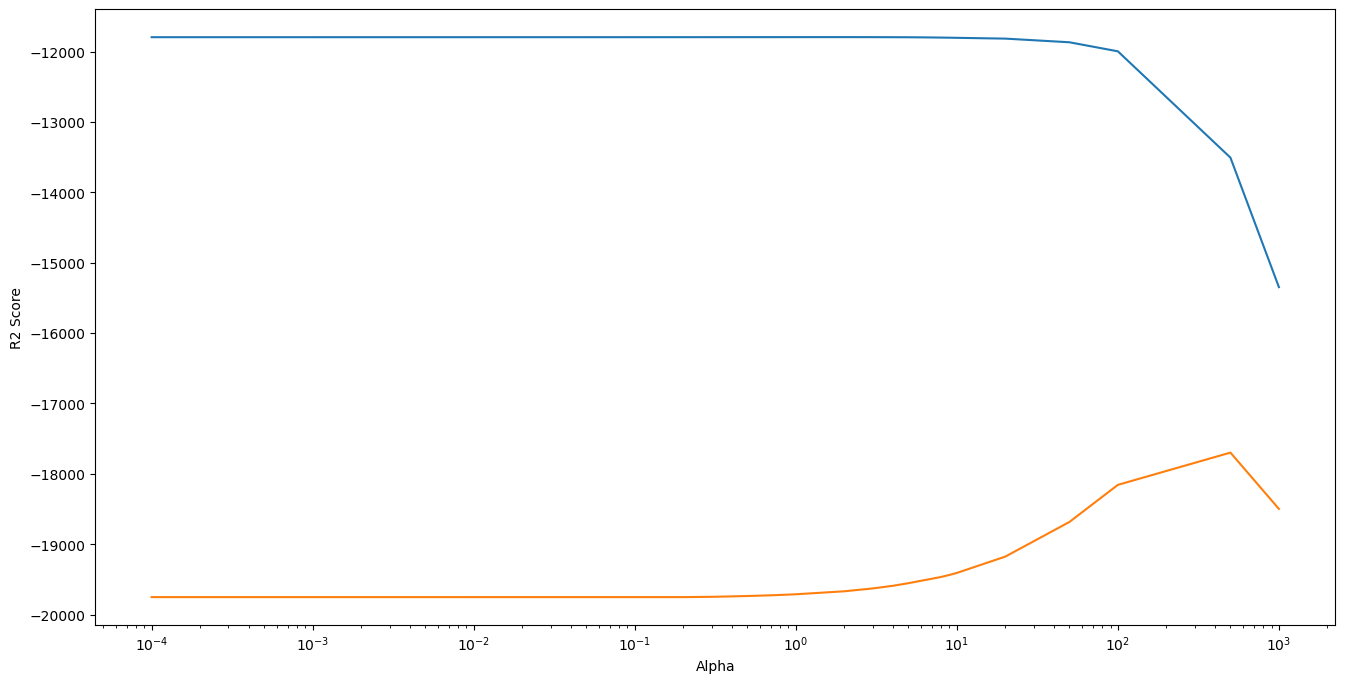

In [559]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [560]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [561]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
0,MSSubClass,180352.436491
109,RoofMatl_Membran,32685.545033
15,BsmtFullBath,29708.217959
115,Exterior1st_AsphShn,20193.468000
113,RoofMatl_WdShake,20014.020972
114,RoofMatl_WdShngl,13760.964505
4,OverallCond,13210.360439
68,Neighborhood_NridgHt,6680.884076
110,RoofMatl_Metal,6656.891176
25,GarageArea,6342.915984


In [562]:
# Calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

lasso_metrics = []
print_model_scoreing_metrics(y_train,y_pred_train,y_test,y_pred_test,lasso_metrics)

R2 Train : 0.9237707243997753
R2 Test : 0.8443766448950887
RSS Train : 486396047307.3604
RSS Test : 438657501049.37085
MSE Train : 476391819.1061317
MSE. Test : 1001501143.9483353


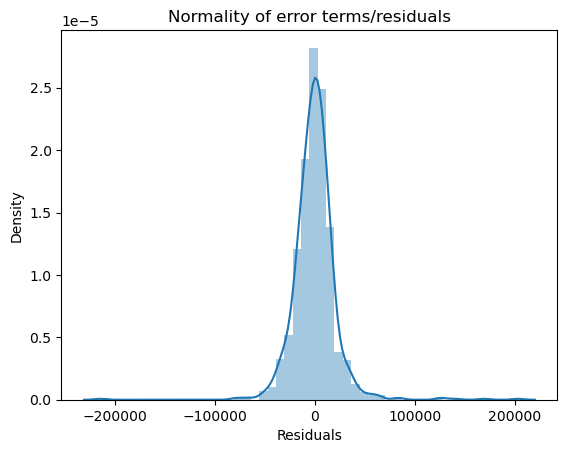

In [563]:
# Distribution of errors -- Normally distributed 
y_residual = y_train - y_pred_train
sns.distplot(y_residual, kde=True)

plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

#### Observations - 
In summary, for lasso:
- The best hyperparameter alpha is 500
- r-squared train = 0.92, r-squared test: 0.84
- There is improvement in r-squared test when compared to linear regression.
- Top 5 features defining "SalePrice" are:
  - MSSubClass
  - RoofMatl_Membran
  - BsmtFullBath
  - Exterior1st_AsphShn
  - RoofMatl_WdShake

In [564]:
# Creating a table which contain all the metrics

lr_table = {
    'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)', 'MSE (Train)','MSE (Test)']
}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(ridge_metrics, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metrics, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric,rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.837830e-01,9.237707e-01
1,R2 Score (Test),8.567834e-01,8.443766e-01
2,RSS (Train),7.415455e+11,4.863960e+11
3,RSS (Test),4.036865e+11,4.386575e+11
4,MSE (Train),2.694983e+04,2.182640e+04
5,MSE (Test),3.035883e+04,3.164650e+04


## Analyzing the models wrt r-squared, rss and mse for train and test dataset respectively.

In [565]:
betas = pd.DataFrame(index = X.columns)
betas.rows = X.columns

betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso
MSSubClass,-2770.183439,-6189.403076
LotFrontage,633.808073,-0.000000
LotArea,2785.862667,3935.152890
OverallQual,8808.203342,13210.360439
OverallCond,2729.973387,4687.021687
YearRemodAdd,3020.964067,3204.716557
MasVnrArea,3923.060032,2998.831898
BsmtFinSF1,2490.515275,2365.192025
BsmtFinSF2,731.491385,0.000000
BsmtUnfSF,996.713564,-0.000000


In [566]:
betas.sort_values(by=['Ridge'], ascending=False).head()

,Ridge,Lasso
OverallQual,8808.203342,13210.360439
GrLivArea,8270.133634,29708.217959
Neighborhood_NoRidge,6089.431865,6680.884076
Neighborhood_NridgHt,5582.710944,6026.481333
1stFlrSF,5531.824699,0.000000


In [567]:
betas.sort_values(by=['Lasso'], ascending=False).head()

,Ridge,Lasso
RoofMatl_CompShg,1801.430512,32685.545033
GrLivArea,8270.133634,29708.217959
RoofMatl_WdShngl,5160.505781,20193.468000
RoofMatl_Tar&Grv,351.094151,20014.020972
RoofMatl_WdShake,602.303948,13760.964505


#### Features Eliminated by lasso

In [568]:
lasso_feature_eliminated_count = (betas['Lasso'] == 0).sum()
print(f"Total number of feature eliminated by Lasso - {lasso_feature_eliminated_count}")

Total number of feature eliminated by Lasso - 114


# Conclusion
* Model Accuracy for ridge & lasso are almost similar (based on the test metrics )
* Alpha value turned out to be 500 (Ridge) and 500 (Lasso).
* Lasso model seems to be better as it is less complex without much dip in accuracy
* Residuals in both the cases are normally distributed